In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

from math import sqrt, fabs
from scipy.optimize import minimize
from IPython.display import Image
from matplotlib.pyplot import imshow

sys.path.append('../')
from map import Map
from ph import *

plt.rcParams['figure.figsize'] = [24, 16] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50


A picture taken from the statue of Liberty.
[('High building on the very left', (40.7136346, -74.0446077), (297, 547), 163),
 ('Ellis Island West', (40.697827, -74.043181), (302, 456), 297),
 ('Big building on the left', (40.7130429, -74.0340377), (345, 544), 619),
 ('Ellis Island Tip of Triangle', (40.6980437, -74.0393193), (325, 459), 781),
 ('Empire State Building', (40.7483735, -73.985603), (556, 749), 1068),
 ('Freedom Tower', (40.7131094, -74.0130809), (435, 544), 1251),
 ('Green roof', (40.7109769, -74.0034396), (451, 509), 1555)]


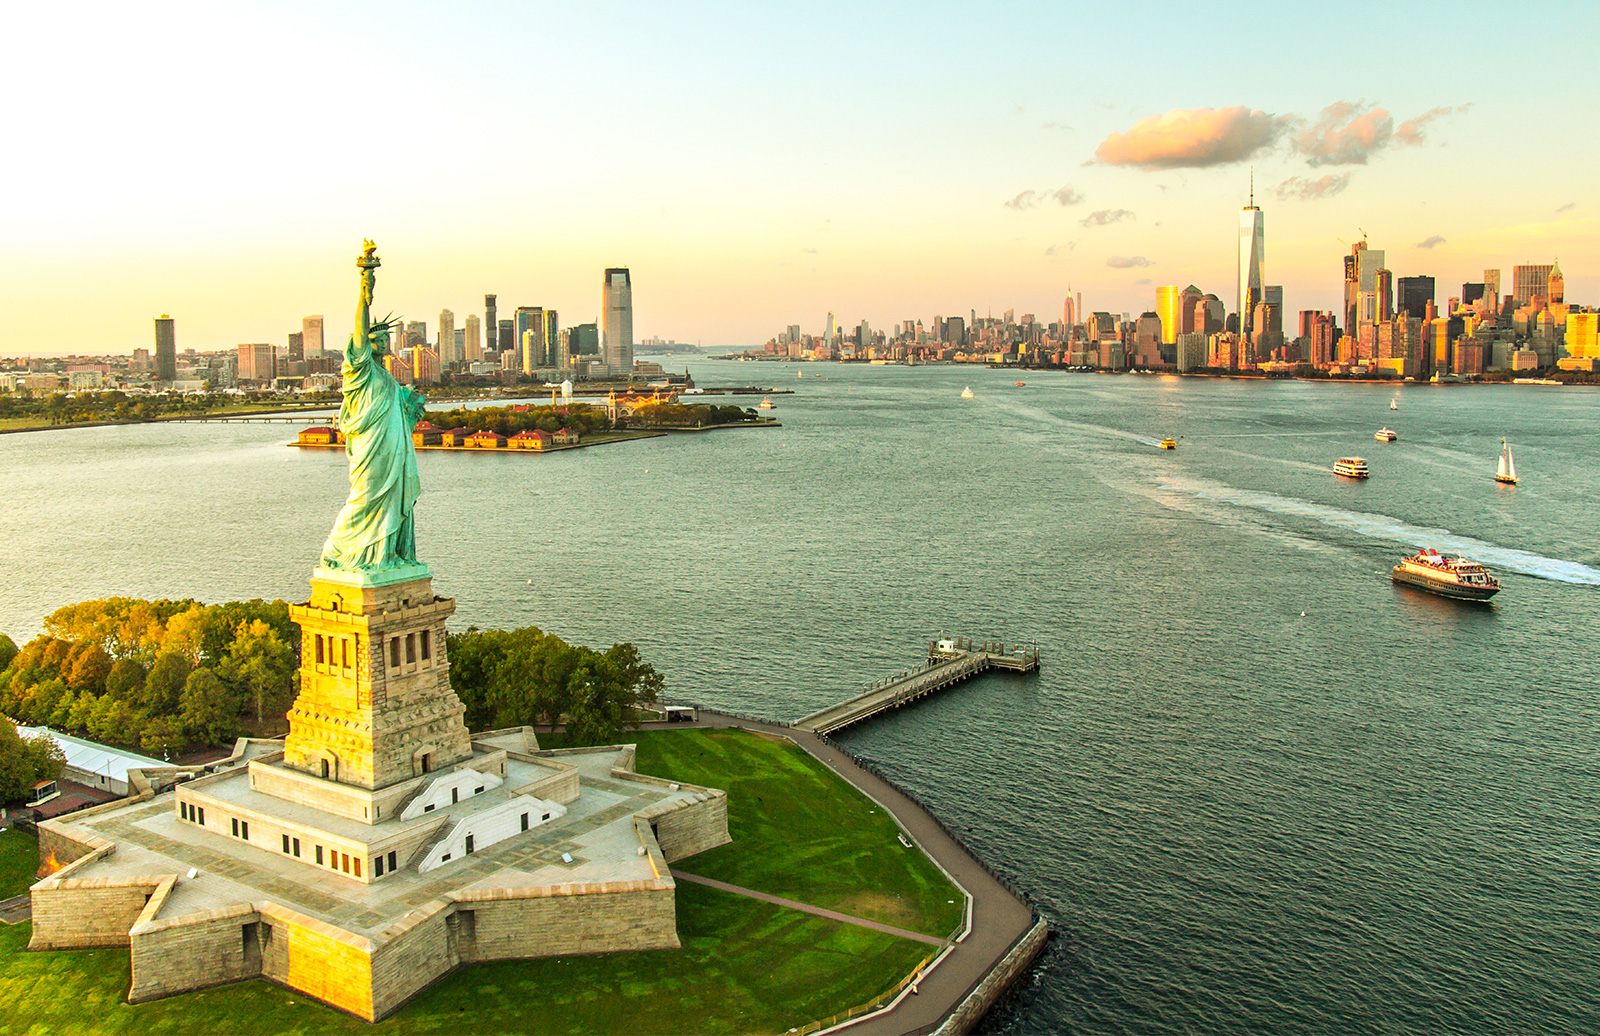

In [2]:
import data.brevent as data
print(format(data.description))
pprint.pprint(data.points)
Image(filename=data.picture)

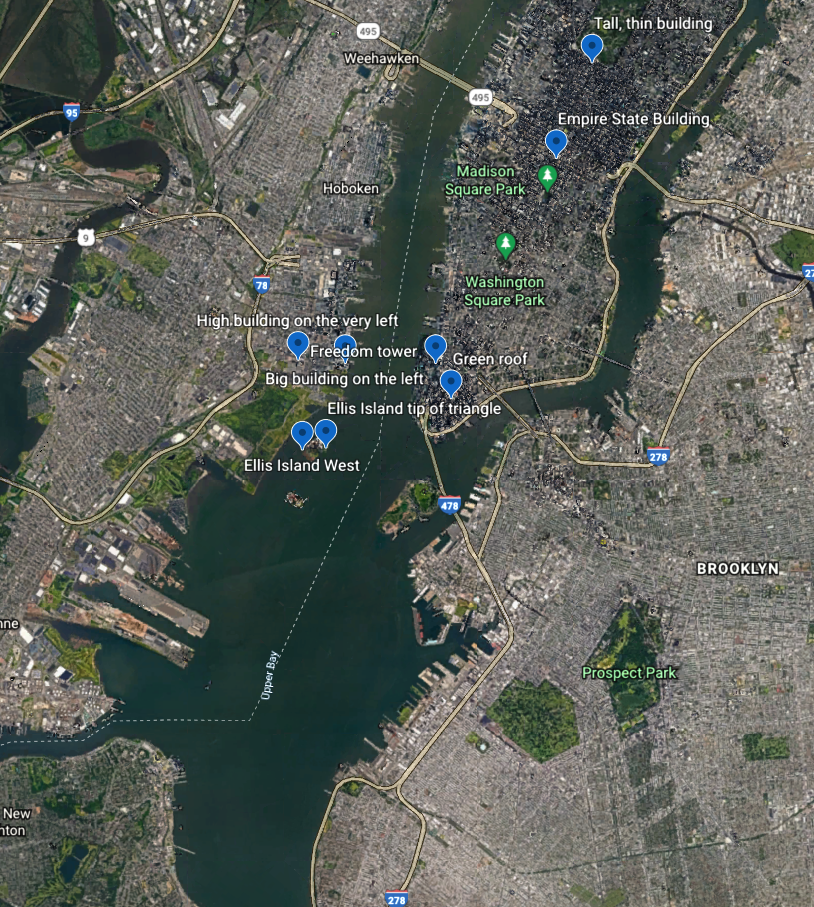

In [3]:
Image(filename=data.map)

Barrycenter: (226.21202830628098, 248.41502498260152)


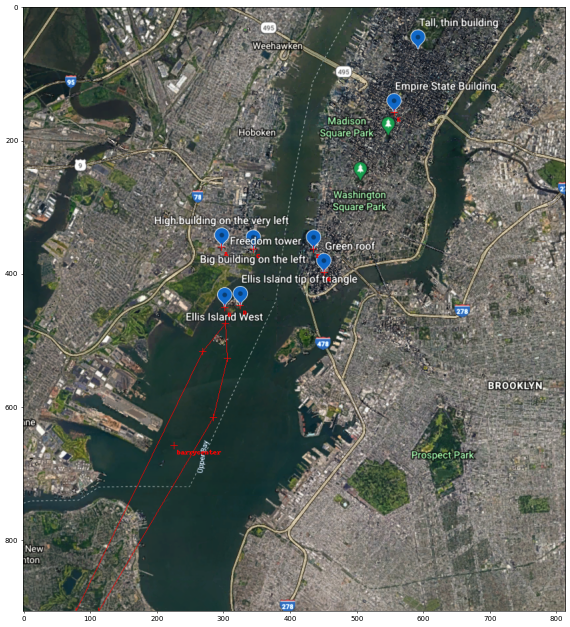

In [4]:
# Create a map and start drawing summits, photographer and area
map = Map(file=data.map)
for (summit, name) in zip(data.summits, "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(summit, name, color="red")

if data.photographer is not None:
    map.draw_point(data.photographer, "P", color="red")

area = photographer_area(data.summits, data.dimensions)
map.draw_area(area, color="red")

barrycenter = barycenter(area)
map.draw_point(barrycenter, "barrycenter", color="red")
print("Barrycenter:", barrycenter)

map.show()

Optimizer:
  photographer: [ -25.7441779  -368.02982654]
  error: 129688.0845806254

Barrycenter  :
  photographer: (226.21202830628098, 248.41502498260152)
  error: 229632.04837726365



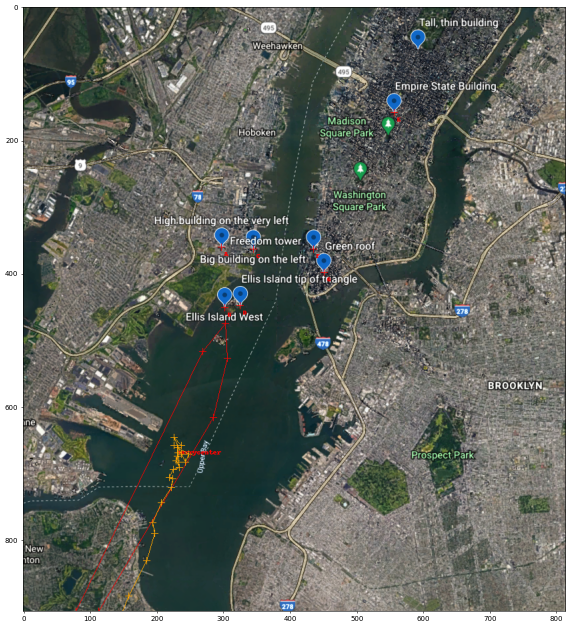

In [5]:
# Run the optimizer to locate the photographer
photograper, error, path = optimize_photograper(
    dimensions=map.dimensions,
    summits=data.summits,
    projections=data.projections
)
print("Optimizer:\n  photographer: {}\n  error: {}\n".format(photograper, error))
#pprint.pprint(path)

# Compute error at real location (or barrycenter)
refname, refpos = "Barrycenter", barrycenter
if data.photographer is not None:
    refname, refpos = "Reality", data.photographer
res = optimize_lens(photographer=refpos, summits=data.summits, projections=data.projections)
print("{}  :\n  photographer: {}\n  error: {}\n".format(refname, refpos, res.error))

# Display optimized position of the photographer
map.draw_path(path, color="orange")
map.draw_point(photograper, name="Q", color="red")

map.show()

colorization: 1 %
colorization: 2 %
colorization: 3 %
colorization: 4 %
colorization: 5 %
colorization: 6 %
colorization: 7 %
colorization: 8 %
colorization: 9 %
colorization: 10 %
colorization: 11 %
colorization: 12 %
colorization: 13 %
colorization: 14 %
colorization: 15 %
colorization: 16 %
colorization: 17 %
colorization: 18 %
colorization: 19 %
colorization: 20 %
colorization: 21 %
colorization: 22 %
colorization: 23 %
colorization: 24 %
colorization: 25 %
colorization: 26 %
colorization: 27 %
colorization: 28 %
colorization: 29 %
colorization: 30 %
colorization: 31 %
colorization: 32 %
colorization: 33 %
colorization: 34 %
colorization: 35 %
colorization: 36 %
colorization: 37 %
colorization: 38 %
colorization: 39 %
colorization: 40 %
colorization: 41 %
colorization: 42 %
colorization: 43 %
colorization: 44 %
colorization: 45 %
colorization: 46 %
colorization: 47 %
colorization: 48 %
colorization: 49 %
colorization: 50 %
colorization: 51 %
colorization: 52 %
colorization: 53 %
co

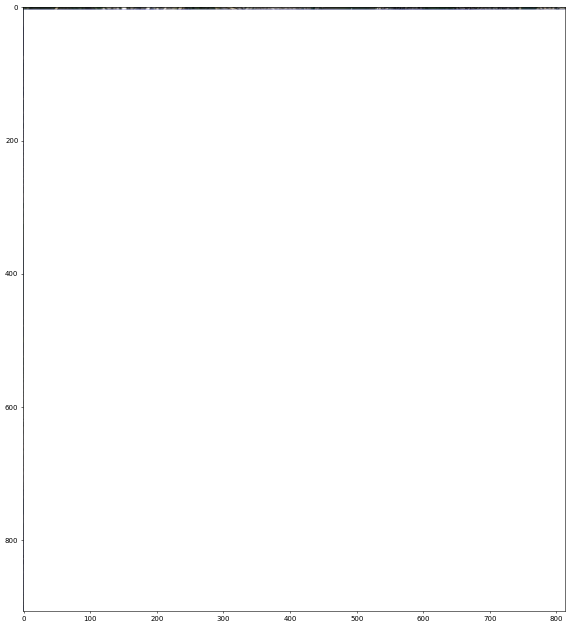

In [6]:
def error(point):
    try:
        return optimize_lens(point, data.summits, data.projections).error
    except:
        return 0

map.fast_hot_colorize(colorfun=error)
map.show()